In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


chechking missing values

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

checking some infos abt the dataset

In [ ]:
df.shape

(2772, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


turning non numerical values into numerical ones

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df.replace({'sex':{'male':0, 'female':1}},inplace=True)

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df.replace({'region':{'southwest':0, 'southeast':1 ,'northwest':2, 'northeast':3 }},inplace=True)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,1,1,8569.86180
2768,21,1,34.600,0,1,0,2020.17700
2769,19,0,26.030,1,0,2,16450.89470
2770,23,0,18.715,0,1,2,21595.38229


In [ ]:
# Separating features in X and target in Y
x= df.drop(columns=['charges'], axis=1)
y = df['charges']

In [ ]:
# Feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [ ]:
pca = PCA(n_components=0.9)  # Try to retain 90% of variance
X_reduced = pca.fit_transform(x_scaled)



In [ ]:
#feature selection with PCA
pca = PCA(n_components=2)  # Choose number of components or use explained variance ratio
x_reduced = pca.fit_transform(x_scaled)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,1,1,8569.86180
2768,21,1,34.600,0,1,0,2020.17700
2769,19,0,26.030,1,0,2,16450.89470
2770,23,0,18.715,0,1,2,21595.38229


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=101)
print(x.shape,X_train.shape,X_test.shape)

(2772, 6) (2217, 6) (555, 6)


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,1,1,8569.86180
2768,21,1,34.600,0,1,0,2020.17700
2769,19,0,26.030,1,0,2,16450.89470
2770,23,0,18.715,0,1,2,21595.38229


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb


In [ ]:
model = xgb.XGBRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.1, 0.05, 0.01],
    # Add other relevant XGBoost hyperparameters here
}

# Create a GridSearchCV object with XGBoost Regressor
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Fit the grid search to your training data (X_train, Y_train)
grid_search.fit(X_train, Y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [ ]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
testing_data_prediction = model.predict(X_test)

In [ ]:
#the score of the model
from sklearn import metrics
score = metrics.r2_score(Y_test,testing_data_prediction)
score

0.959327286848193

In [ ]:
#mse and mae to know how far the values predicted can  be from the actual ones
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_test, testing_data_prediction)
mse = mean_squared_error(Y_test, testing_data_prediction)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 1147.127073656426
Mean Squared Error: 6200215.576795081


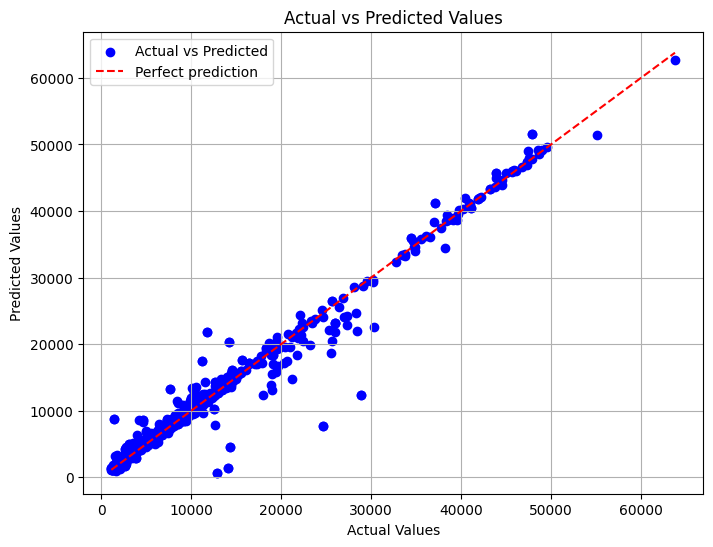

In [ ]:
#showing the diagram of actual vs predicted values
import matplotlib.pyplot as plt
import numpy as np

actual_values = Y_test
predicted_values = testing_data_prediction

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, color='blue', label='Actual vs Predicted')
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--', label='Perfect prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
input_data = (19,0,27.9,0,1,3)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Predicted Medical Insurance Cost : ',str(prediction))

Predicted Medical Insurance Cost :  [1972.7765]


In [ ]:
import pickle

filename = 'Medical-Insurance-Cost-Prediction.sav'
pickle.dump(model, open(filename,'wb'))